<a href="https://colab.research.google.com/github/yusufemrekatkat/Customer_Support_Calls/blob/main/Churn_Prediction_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. SENTETİK VERİ ÜRETİMİ (Business Logic ile Entegre)
def generate_customer_data(n_samples=1000):
    np.random.seed(42) # Sonuçlar her seferinde aynı çıksın diye sabitliyoruz.

    # Rastgele veriler oluşturuyoruz
    data = pd.DataFrame()
    data['customer_id'] = range(1, n_samples + 1)
    data['monthly_bill'] = np.random.normal(50, 15, n_samples) # Ort: 50$, Std: 15$
    data['total_transactions'] = np.random.randint(1, 100, n_samples)
    data['customer_support_calls'] = np.random.randint(0, 10, n_samples) # 0-10 arası şikayet
    data['tenure_months'] = np.random.randint(1, 60, n_samples) # 1-60 ay arası üyelik

    # Şimdi "Churn" mantığını matematiksel olarak biz kuralım (Yapay Zeka bunu keşfetsin)
    # Kural: Şikayet araması çoksa ve üyelik süresi kısaysa Churn ihtimali artsın.

    # Temel olasılık
    churn_prob = 0.2

    # Etkiler (Ağırlıklar)
    # Şikayet sayısı arttıkça olasılık %10 artar
    churn_prob_adjustment = (data['customer_support_calls'] * 0.10)
    # Üyelik süresi arttıkça olasılık %0.5 azalır (Sadakat)
    loyalty_adjustment = (data['tenure_months'] * -0.005)

    final_prob = churn_prob + churn_prob_adjustment + loyalty_adjustment

    # Olasılıkları 0-1 arasına sıkıştır (Sigmoid mantığına benzer basit bir işlem)
    final_prob = np.clip(final_prob, 0, 1)

    # Olasılığa göre 1 veya 0 ata (Binomial Dağılım)
    data['churn'] = np.random.binomial(1, final_prob)

    return data

# Veriyi oluştur ve ilk 5 satıra bak
df = generate_customer_data(1000)
print("Veri Seti Özeti:")
print(df.head())
print("\nChurn Dağılımı:")
print(df['churn'].value_counts())

Veri Seti Özeti:
   customer_id  monthly_bill  total_transactions  customer_support_calls  \
0            1     57.450712                  44                       9   
1            2     47.926035                  49                       5   
2            3     59.715328                  75                       4   
3            4     72.845448                  61                       3   
4            5     46.487699                  67                       2   

   tenure_months  churn  
0             26      1  
1             40      1  
2              9      0  
3             55      1  
4              5      1  

Churn Dağılımı:
churn
0    523
1    477
Name: count, dtype: int64


In [22]:
# 2. MODEL EĞİTİMİ

# Özellikler (X) ve Hedef (y) ayrımı
# customer_id tahmin için gereksiz, atıyoruz.
X = df[['monthly_bill', 'total_transactions', 'customer_support_calls', 'tenure_months']]
y = df['churn']

# Veriyi Eğitim (%80) ve Test (%20) olarak bölme
# Stratify=y: Churn oranını hem eğitim hem test setinde dengeli tutar.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest Modeli
# n_estimators=100: 100 tane karar ağacı oluşturup oylama yapacak.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model Eğitimi Tamamlandı!")

Model Eğitimi Tamamlandı!


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       105
           1       0.71      0.65      0.68        95

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



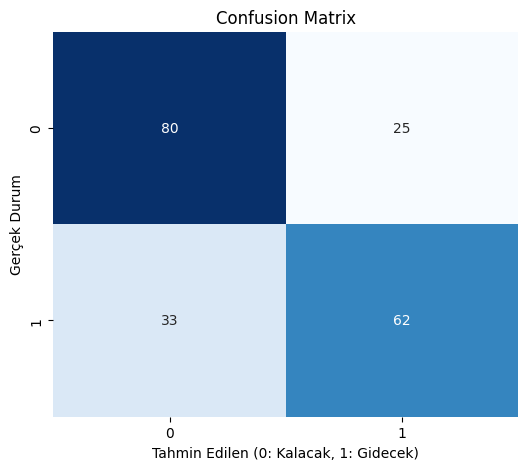

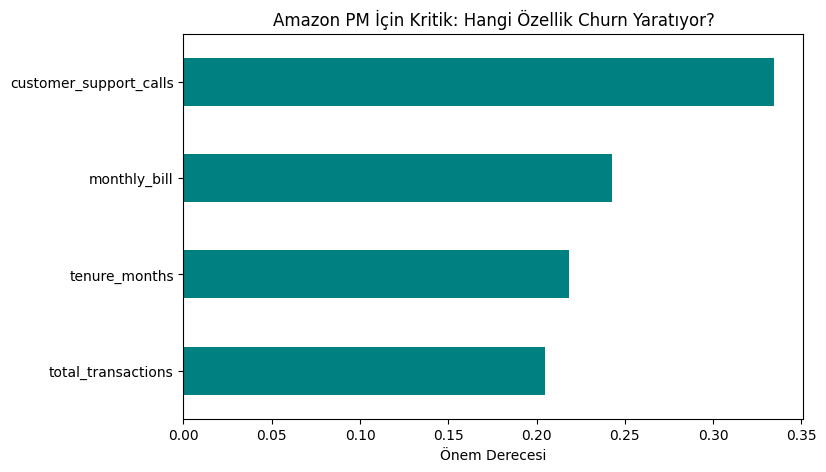

In [23]:
# 3. DEĞERLENDİRME

# Tahmin yap
y_pred = model.predict(X_test)

# Raporu yazdır
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Görselleştirmesi
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Tahmin Edilen (0: Kalacak, 1: Gidecek)')
plt.ylabel('Gerçek Durum')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance (Hangi özellik Churn'ü tetikledi?)
plt.figure(figsize=(8, 5))
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='teal')
plt.title('Amazon PM İçin Kritik: Hangi Özellik Churn Yaratıyor?')
plt.xlabel('Önem Derecesi')
plt.show()